# Module 1B
# The discrete SIS model for infectious disease.

In order for disease to spread, you need at least two groups of individuals: susceptible and infectious.

- Susceptible (S): doesn't harbor the pathogen and is capable of being infected.
- Infectious (I): harbors the pathogen and is capable of transmitting it to others.
- (( R - recovered/removed as in SIR model. ))
- (( For now, only these 2 variables ))

Let's assume for now that our individuals are people, but they need not be.  They could be plants or non-human animals as well! How do new infections arise?  The susceptible individual must come into contact with the pathogen in some way, but there are various possible modes of transmission, including the categories of direct and indirect transmission.  See for example the CDC definitions here: https://www.cdc.gov/csels/dsepd/ss1978/lesson1/section10.html

We will consider here a directly transmitted disease that spreads through droplets.  Some additional assumptions:

1. No immunity is gained by having been infected. This means I-individuals return to S when they recover. 

((Why it's called SIS

S to I is "new infection event" 
I to S is "recovery events" )) 


2. The only demography is births and natural deaths (no immigration or emmigration)
3. The disease does not affect population demographics (i.e. disease is non-fatal, and disease doesn't impact births).
4. All individuals are born susceptible.

We are interested in tracking the number of S and I individuals over time.  In particular, we will track the number of individuals at discrete points in time $t_n$, $n=0,1,2,\ldots$, which we can refer to as 'generations'.

On paper, try to come up with your own model for this process using the idea of differnce equations.  This should look something like:

\begin{align}
S_{n+1} = f(I_n, S_n, N_n)\\
I_{n+1} = g(I_n, S_n, N_n)
\end{align}

(( You need S and I to get an N ! )) 

where $N_n = S_n + I_n$ is the total population size.

Note: Here, I'm using the notation that X_n = X(t_n).

((Assume there is no immigration/emmigration in the community, but allow for natural births and natural deaths. )) 

((Once you enter I, you are immediately infectious. And once you are recovered, you go immediately back into S. ))

You can approach this task by first trying to describe your equation in words?  What happens when someone is born? dies? becomes infected? recovered?  Where should those events go in your equations?

# Brainstorming for equation: 



N(0) = S(0) + I(0)
S = N - I 

S = susceptible 
I = infectious
N = total population = S + I 
N over a set of time: 
N = N(0) + births (since time 0) - deaths (since time 0)

S over a set of time: 
S = S(0) + recovered - infected 

I over a set of time: 
I = I(0) - recovered + infected

An equation for the susceptible population
S = N - I 
S = (N(0) + births - deaths) - (I(0) - recovered + infected)

Maybe we can use a known average for births and deaths. Or a known birth rate - death rate. 

birth rate = $b$
death rate = $d$

You could have a birth rate dependent on the births from 20 years ago (this pop. is probably giving birth now). 
(a function for the birth rate)

$b(N_{n-20})$

or 
$b(N_0, N_1, N_2, \dots, N_n)$

So... you could factor in age, economy, or other categories, that would influence birth rate. 

Common assumption... births = deaths. 

$ N = N(t_{n-1}) + b*N(t_{n-1}) - d*N(t_{n-1})$

Maybe we should think about infection rate and recovery rate. How long are people staying in the susceptible/infectious category? 

Maybe we'll have an 'r' like in the last module with population growth. 

$r_i$ is the % of the population that has moved to the other group at a certain time. 

$I = r_1(N)$ , a certain amount of the susceptible pop. will be infected , at a set of time after recovery. 
$S = r_2(I)$ , a certain amount of the infectious people will be recovered, at a set of time after infection.

$N = S + I$

$N = r_2(I) + r_1(N)$

# DON'T LOOK at the equations below before you give the previous exercise serious thought :)

# No peaking!

# OK...now you can look...

There are different ways that we could formulate this model.  Here, I will introduce one published by Castillo-Chavez and Yakuba in 2001 (https://ecommons.cornell.edu/bitstream/handle/1813/32131/BU-1539-M.pdf;sequence=1).  Let's first introduce some notation for our model parameters (the inputs to the model).  One thing that is important to keep in mind is the order of events.  The sequence of events that we will consider here is as follow:

1. Determine how many S and I individuals at $t_n$ survive to generation $t_{n+1}$.
2. Of those surviving S individuals, determine how many become infected.  Of those surviving I individuals, how many recover?

$\gamma$ - probability of NOT dying in each generation.

$\sigma$ - probability of NOT recovering in each generation.

$G(x)$ - probability that an S individual does NOT become infected in each generation.  This should be a function of the disease prevalence, that is, $x = \frac{I_n}{N_n}$.

Using this notation, see if you can derive the corresponding model.

Note: anything that is a probability should be between 0 and 1.

Note: Read Castillo-Chavez and Yakuba. 



## Derivation of the model below: 

$S_{n+1} = f(S_n, I_n, N_n) $

$I_{n+1} = g(S_n, I_n, N_n) $

$\gamma$ = probability of NOT dying in 1 time step. (prob of surviving)

$\sigma$ = probability of NOT recovering in 1 time step. 

if time int = 10 weeks, which is a long time, you must make decisions. 

sequence of events:
(1) how many survive?
(2) of those susceptible that survive, how many become infected? 
(3) of those infected that survive, how many recover? 

$ f(N) $ = # births in 1 timestep (could depend on current population (linear, log (if the number of births level off as N gets large), exponential) or be constant(does not depend on N))

$S_{n+1} =  f(N_n) + \gamma*S_n $
account for births and survival from last time step
assumption that all individuals are born susceptible

$I_{n+1} = \gamma*I_n + $
account for infected people surviving, 


new infections = $\gamma * S_n$ * prob of getting infected

= $\gamma * S_n * (1 - G(I_n/N_n))$

recoveries = $ \gamma * I_n$ * prob of recovering
= $\gamma * I_n * (1-\sigma) $ 

Put the pieces together

$S_{n+1} = f(N_n) + \gamma * S_n - \gamma*S_n(1-G) + \gamma(1-\sigma) * I_n $

$I_{n+1} = \gamma*I_n + \gamma*(1-G)*S_n - \gamma*(1-\sigma)*I_n $

cancel some terms you get the following system of equations. 


\begin{align}
S_{n+1} &= f(N_n) + \gamma S_n + (1-\sigma)\gamma I_n - \gamma S_n(1-G(I_n/N_n)) \\
I_{n+1} &= \gamma I_n - (1-\sigma)\gamma I_n + \gamma S_n (1 - G(I_n/N_n))
\end{align}

You should end up with the following system of equations:

\begin{align}
S_{n+1} &= f(N_n) + \gamma S_n + (1-\sigma)\gamma I_n - \gamma S_n(1-G(I_n/N_n)) \\
I_{n+1} &= \gamma I_n - (1-\sigma)\gamma I_n + \gamma S_n (1 - G(I_n/N_n))
\end{align}

Write some code to compute the solution over a series of time points and plot the trajectories over time.  You get to choose the values for the initial conditions, parameters, the time points, and the time span.

In [9]:
# we choose the values for the initial conditions, parameters, time points, time span

S = 0 # initial value of susceptible 
I = 10 # initial value of infected 

N = S + I # total pop = susceptible + infected 

# f = number of births
def f(N): 
    return 1.7*N  # there are 1.7 births per individual (birth rate in the US in 2019)

# G(x) = probability that an S individual does NOT become infected in each generation. 
def G(I, N):
    x = I/N #function of disease prevalence 
    return (1 - x) # the probability of NOT getting infected is 1 - (probability of getting infected)

# what should happen to G(x) when the input is small vs large? 
    # if the input is small... this means the ratio of infected to total pop is small... 
    # meaning the likelihood of getting sick is small

    # if the input is large... this means the ratio of infected to total pop is large...
    # meaning the likelihood of getting sick is large

gamma = 0.9 #probability of *not* dying in each generation
sigma = 0.2 #probability of *not* recovering in each generation

In [12]:
S = f(N) + gamma*S - gamma*S*(1- G(I,N)) + (1-sigma)*gamma*I
I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-G(I,N))

## now to turn this into a function with inputs S,I, gamma, sigma

In [44]:
def f(N): 
    return .004*N
def G(I, N):
    x = I/N 
    return (x)

In [45]:
def CCY(S, I, gamma = 0.9, sigma = 0.2): # a gamma and sigma are given but can also be redefined
    N = S + I
    S = f(N) + gamma*S - gamma*S*(1-G(I,N)) + (1-sigma)*gamma*I
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-G(I,N))
    return S, I, S+I

In [46]:
# try to define a new CCY that depends on birth rate 
def CCY_b(S,I, gamma=0.9, sigma =0.2, br = 0.004):
    N = S + I
    S = br*N + gamma*S - gamma*S*(1-G(I,N)) + (1-sigma)*gamma*I
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-G(I,N))
    return S, I, S+I

In [47]:
# define a new CCY that depends on birth rate and prob. of NOT getting infected. 
def CCY_bg(S, I, gamma=0.9, sigma=0.2, br=0.004, g=0.7):
    S = br*(S+I) + gamma*S - gamma*S*(1-g) + (1-sigma)*gamma*I
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-g)
    return S, I, S+I

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# How do we want to represent the graph? 
# 1. comparing infected to susceptible
# 2. comparing infected to total pop 
# 3. comparing susceptible to total pop


def plot_CCY(S, I, T = 5, gamma = 0.9, sigma = 0.2):
    S_list = []
    I_list = []
    N_list = []
    N = S + I
    for i in range(T):
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S, I, N = CCY(S, I, gamma, sigma)
        
    #1. Susceptible vs. Infected
    plt.plot(S_list, I_list, c = 'r')
    plt.ylim([0, N])
    plt.xlabel('Susceptible Population')
    plt.ylabel('Infected Population')
    plt.title('Susc v Inf Pop with {0} = {1} and {2} = {3}'.format('$\gamma$', gamma, '$\sigma$', sigma))
    plt.show()
    
    #2. Infected vs. Total
    plt.plot(I_list, N_list, c = 'c')
    plt.ylim([0, N])
    plt.xlabel('Infected Population')
    plt.ylabel('Total Population')
    plt.title('Infected Pop with {0} = {1} and {2} = {3}'.format('$\gamma$', gamma, '$\sigma$', sigma))
    plt.show()
    
    #3. Susceptible vs. Total
    plt.plot(S_list, N_list, c = 'g')
    plt.ylim([0, N])
    plt.xlabel('Susceptible Population')
    plt.ylabel('Total Population')
    plt.title('Susceptible Pop with {0} = {1} and {2} = {3}'.format('$\gamma$', gamma, '$\sigma$', sigma))
    plt.show()

# $\gamma =$  Probability of NOT dying 

# $\sigma =$ Probability of NOT recovering

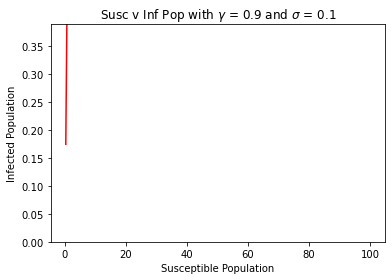

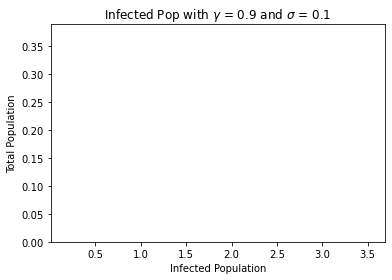

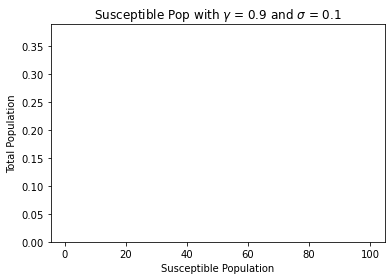

In [50]:
# RECALL: plot_CCY(S, I, T, gamma, sigma)
plot_CCY(100, 2, 20, 0.9, 0.1)

In [6]:
# define a new CCY that depends on birth rate and prob. of NOT getting infected. 
def CCY_bg(S, I, gamma=0.9, sigma=0.2, br=0.004, g=0.7):
    S = br*(S+I) + gamma*S - gamma*S*(1-g) + (1-sigma)*gamma*I
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-g)
    return S, I, S+I

In [7]:
## Try to define functions in terms of the time step. 

def T_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, T = 10, br = 0.02, g= 0.8):
    x = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in x:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, g)
        
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))
    
    #1. plotting time vs susceptible pop. 
    plt.plot(x, S_list, c='c', label='susceptible', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Susceptible Population')
    plt.title('Susceptible Population with {0} time steps'.format(T))
    plt.show()
    
    #2. plotting time vs infected pop. 
    plt.plot(x, I_list, c='g', label='infected', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Infected Population')
    plt.title('Infected Population with {0} time steps'.format(T))
    plt.show()
    
    #3. plotting time vs. total pop. 
    plt.plot(x, N_list, c='r', label='total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Total Population')
    plt.title('Total Population with {0} time steps'.format(T))
    plt.show()

Some examples of annual population growth, for inputs of br. 
U.S. 0.4% 

India 1%

U.K. 0.47%

Russia -0.02%

# $\gamma =$  Probability of NOT dying 

# $\sigma =$ Probability of NOT recovering
T is the number of time steps you choose

br is the birth rate constant (pop growth is br x N)

g is the probability of NOT getting infected

In [184]:
# T_plot_CCY(Susc. Pop, Inf. Pop, gamma, sigma, T, br, g)

Your input: 
 Population growth rate is 3.0% and probability of infection is 20.0%.
 The probability of NOT dying is 95.0% and 
 the probability of NOT recovering is 20.0%.

 Population Growth Information: 

The probability of dying is 5.0% which is greater than the population growth rate, 3.0%. 
 This means that the total population decreases over time.


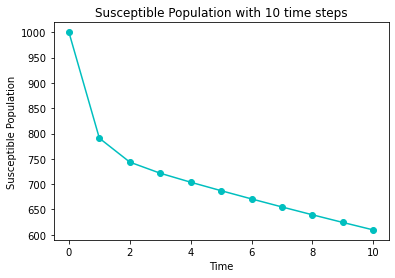

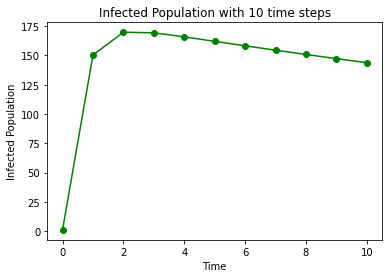

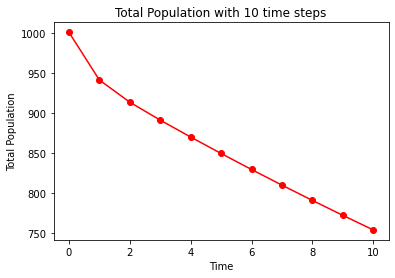

In [9]:
T_plot_CCY(1000, 1, 0.95, 0.2, 10, 0.03, 0.8)

In [ ]:
# Next: Combine 3 lines onto one graph? 

--- NOTES FROM 4/20/22 --- 

brainstorm: different control strategies? 
reduce transmission probability (like masks, hygiene practices)
recovery probability (treatment)
introduce recovered class- permanent immunity or not
vaccinated class

--- to search for journal articles --- 
MathScinet Database (mostly mathematical) in university library
Google Scholar -- cite feature to grab reference
if not available -- you can also request a copy of a journal article through library website. 

